# METRO

importando as bibliotecas e lendo o arquivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
print(df.shape)

(48204, 9)


Foi adicionado o dia, mês e hora como atributo, dessa forma, não precisamos nos preocupar com qual feriado, pois isso vai estar implicito no dia e no mês

In [3]:
df['day'] = (pd.to_datetime(df['date_time']).dt.weekday).astype(int)
#df['month'] = (pd.to_datetime(df['date_time']).dt.month).astype(int)
df['hour'] = (pd.to_datetime(df['date_time']).dt.hour).astype(int)
df.drop(columns = ['date_time'],inplace = True)

In [4]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
day                    0
hour                   0
dtype: int64

In [5]:
df.duplicated().sum()

17

In [6]:
print(f'before drop : {df.shape}')
df = df.drop_duplicates()
print(f'after drop : {df.shape}')

before drop : (48204, 10)
after drop : (48187, 10)


In [7]:
stats = df.describe(include = "all")
stats

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,day,hour
count,48187,48187.000000,48187.000000,48187.000000,48187.000000,48187,48187,48187.000000,48187.000000,48187.000000
unique,12,NaN,NaN,NaN,NaN,11,38,NaN,NaN,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN,NaN,NaN
freq,48126,NaN,NaN,NaN,NaN,15158,11659,NaN,NaN,NaN
mean,NaN,281.204995,0.334382,0.000222,49.365451,NaN,NaN,3259.618134,2.984913,11.397742
std,NaN,13.338738,44.797033,0.008169,39.015213,NaN,NaN,1986.954465,2.006041,6.940373
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,1192.500000,1.000000,5.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,3379.000000,3.000000,11.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,4933.000000,5.000000,17.000000


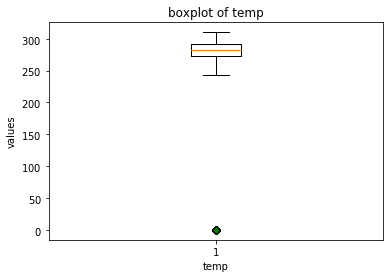

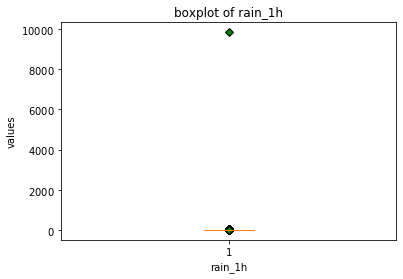

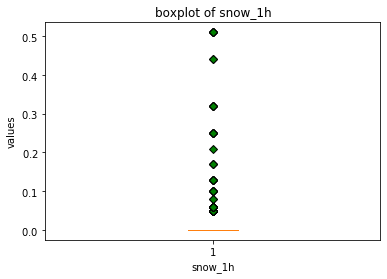

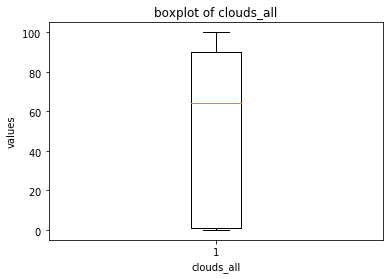

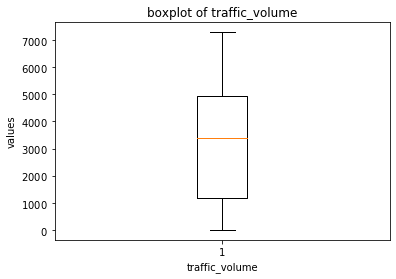

In [8]:
boxplot_columns = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume']
for i,column in zip(range(len(boxplot_columns)),boxplot_columns):
    try:
        plt.figure(i)
        green_diamond = dict(markerfacecolor='g', marker='D')
        plt.boxplot(df[column],flierprops=green_diamond)
        plt.title(f'boxplot of {column}')
        plt.xlabel(f'{column}')
        plt.ylabel('values')
        plt.ticklabel_format(style='sci', axis='y', useMathText = True)
        
    except:
        continue

Os pontos verdes indicam outliers, o que pode ser visto nos gráficos de temp, rain_1h e snow_1h

Com a análise do boxplot, podemos observar que possivelmente existem alguns outliers e dados inconsistentes na base. Para o último caso, podemos dropá-los ou tentar ajeitar seus valores.

## Ajeitando o temp

In [9]:
stats

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,day,hour
count,48187,48187.000000,48187.000000,48187.000000,48187.000000,48187,48187,48187.000000,48187.000000,48187.000000
unique,12,NaN,NaN,NaN,NaN,11,38,NaN,NaN,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN,NaN,NaN
freq,48126,NaN,NaN,NaN,NaN,15158,11659,NaN,NaN,NaN
mean,NaN,281.204995,0.334382,0.000222,49.365451,NaN,NaN,3259.618134,2.984913,11.397742
std,NaN,13.338738,44.797033,0.008169,39.015213,NaN,NaN,1986.954465,2.006041,6.940373
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,1192.500000,1.000000,5.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,3379.000000,3.000000,11.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,4933.000000,5.000000,17.000000


No caso de temp é visível no dataset que os valores de 0 são dados inconsistentes, pois há uma variação brusca nos valores em apenas 10 momentos, ainda, podemos analisar que o segundo valor mínimo seria próximo de 200 enquanto a média equivale a  281 como visto no stats

In [10]:
wrong_temp = df['temp'].loc[df['temp'] == 0].index
print(wrong_temp)

Int64Index([11898, 11899, 11900, 11901, 11946, 11947, 11948, 11949, 11950,
            11951],
           dtype='int64')


In [11]:
print(df.iloc[wrong_temp[0]-4:wrong_temp[3]+4])

      holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
11894    None  256.22      0.0      0.0           0        Clear   
11895    None  255.93      0.0      0.0           0        Clear   
11896    None  255.93      0.0      0.0           0        Clear   
11897    None  255.93      0.0      0.0           0        Clear   
11898    None    0.00      0.0      0.0           0        Clear   
11899    None    0.00      0.0      0.0           0        Clear   
11900    None    0.00      0.0      0.0           0        Clear   
11901    None    0.00      0.0      0.0           0        Clear   
11902    None  255.93      0.0      0.0           0        Clear   
11903    None  255.93      0.0      0.0           0        Clear   
11904    None  255.93      0.0      0.0           0        Clear   

      weather_description  traffic_volume  day  hour  
11894        sky is clear            1255    3    23  
11895        sky is clear             644    4     0  
11896        sky i

Dessa forma, podemos ver que o temp variou de 0 a 255.93 em uma hora e voltou ao mesmo valor logo após 3 horas, mesmo que as condições climáticas tenham permanecido as mesmas

In [12]:
df['temp'].loc[df['temp'] == 0] = np.nan
print(df.isnull().sum())
df ['temp'] = df['temp'].fillna(method = 'ffill')
print(df.isnull().sum())

holiday                 0
temp                   10
rain_1h                 0
snow_1h                 0
clouds_all              0
weather_main            0
weather_description     0
traffic_volume          0
day                     0
hour                    0
dtype: int64
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
day                    0
hour                   0
dtype: int64


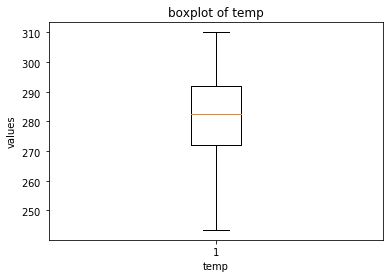

In [13]:
plt.figure(5)
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(df['temp'],flierprops=green_diamond)
plt.title('boxplot of temp')
plt.xlabel('temp')
plt.ylabel('values')
plt.ticklabel_format(style='sci', axis='y', useMathText = True)


Agora temos dados consistentes para o temp

## Ajeitando o rain_1h

In [14]:
stats

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,day,hour
count,48187,48187.000000,48187.000000,48187.000000,48187.000000,48187,48187,48187.000000,48187.000000,48187.000000
unique,12,NaN,NaN,NaN,NaN,11,38,NaN,NaN,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN,NaN,NaN
freq,48126,NaN,NaN,NaN,NaN,15158,11659,NaN,NaN,NaN
mean,NaN,281.204995,0.334382,0.000222,49.365451,NaN,NaN,3259.618134,2.984913,11.397742
std,NaN,13.338738,44.797033,0.008169,39.015213,NaN,NaN,1986.954465,2.006041,6.940373
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,1192.500000,1.000000,5.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,3379.000000,3.000000,11.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,4933.000000,5.000000,17.000000


Podemos ver que o maior outlier observado no boxplot foi algo que destoou para cima. Observando a análise estatística acima, podemos ver que tal valor é 9831.3

In [15]:
wrong_rain = df['rain_1h'].loc[df['rain_1h'] == 9831.3].index
print(wrong_rain)

Int64Index([24872], dtype='int64')


In [16]:
print(df.iloc[wrong_rain[0]-4:wrong_rain[0]+4])

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
24870    None  300.81     0.00      0.0          75  Thunderstorm   
24871    None  301.48     0.00      0.0          75  Thunderstorm   
24872    None  302.11  9831.30      0.0          75          Rain   
24873    None  302.54     0.00      0.0          75  Thunderstorm   
24874    None  302.39     0.00      0.0          75        Clouds   
24875    None  302.45     0.00      0.0          75  Thunderstorm   
24876    None  301.70     0.00      0.0          75  Thunderstorm   
24877    None  300.35     0.51      0.0          75          Rain   

                weather_description  traffic_volume  day  hour  
24870        proximity thunderstorm            4858    0    15  
24871        proximity thunderstorm            5934    0    16  
24872               very heavy rain            5535    0    17  
24873        proximity thunderstorm            3900    0    18  
24874                 broken clouds            2856  

Vemos que, também nesse caso, há um salto descomunal em relação ao segundo valor máximo, além de destoar dos valores adjacentes

In [17]:
df['rain_1h'].loc[df['rain_1h'] == 9831.3] = np.nan
print(df.isnull().sum())
df ['rain_1h'] = df['rain_1h'].fillna(method = 'ffill')
print(df.isnull().sum())

holiday                0
temp                   0
rain_1h                1
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
day                    0
hour                   0
dtype: int64
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
day                    0
hour                   0
dtype: int64


/home/itamar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


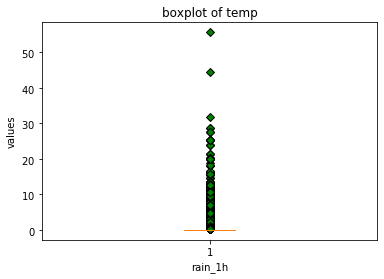

In [18]:
plt.figure(6)
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(df['rain_1h'],flierprops=green_diamond)
plt.title('boxplot of temp')
plt.xlabel('rain_1h')
plt.ylabel('values')
plt.ticklabel_format(style='sci', axis='y', useMathText = True)


agora podemos ver que mesmo possuindo alguns outliers, esses números são condizentes com a realidade da amostra 

## observando o snow_1h

In [19]:
stats

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,day,hour
count,48187,48187.000000,48187.000000,48187.000000,48187.000000,48187,48187,48187.000000,48187.000000,48187.000000
unique,12,NaN,NaN,NaN,NaN,11,38,NaN,NaN,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN,NaN,NaN
freq,48126,NaN,NaN,NaN,NaN,15158,11659,NaN,NaN,NaN
mean,NaN,281.204995,0.334382,0.000222,49.365451,NaN,NaN,3259.618134,2.984913,11.397742
std,NaN,13.338738,44.797033,0.008169,39.015213,NaN,NaN,1986.954465,2.006041,6.940373
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,1192.500000,1.000000,5.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,3379.000000,3.000000,11.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,4933.000000,5.000000,17.000000


In [20]:
snow = len(df['rain_1h'].loc[df['rain_1h'] > 0])
print(snow)

3466


dentre as 48.187 amostras, só há neve em 3466. O valor máximo não parece destoar tanto dos outros valores

# Encoding

Aqui transformaremos as colunas que tem seus atributos representados por nomes em números

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
encoder = LabelEncoder()

In [23]:
df['holiday'].loc[df['holiday'] == 'None'] = str(0)

/home/itamar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
df['holiday'] = encoder.fit_transform(df['holiday'])
df['weather_main'] = encoder.fit_transform(df['weather_main'])
df['weather_description'] = encoder.fit_transform(df['weather_description'])

In [25]:
df['holiday'].value_counts()

0     48126
4         7
9         6
7         6
5         6
1         6
11        5
10        5
8         5
6         5
3         5
2         5
Name: holiday, dtype: int64

Agora, vamos, para facilitar e eliminar dados irrelevantes/de pouca influência, transformar tudo que for feriado em 1 e o que não for em zero, visto que como há pouca repetição nos feriados o algoritmo pode não distinguir bem

In [26]:
df['holiday'].loc[df['holiday'] > 0] = 1

In [27]:
df['holiday'].value_counts()

0    48126
1       61
Name: holiday, dtype: int64

In [28]:
df.describe()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,day,hour
count,48187.000000,48187.000000,48187.000000,48187.000000,48187.000000,48187.000000,48187.000000,48187.000000,48187.000000,48187.000000
mean,0.001266,281.258037,0.130358,0.000222,49.365451,2.578642,16.540021,3259.618134,2.984913,11.397742
std,0.035557,12.713954,1.003542,0.008169,39.015213,2.784148,8.969561,1986.954465,2.006041,6.940373
min,0.000000,243.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,272.160000,0.000000,0.000000,1.000000,0.000000,10.000000,1192.500000,1.000000,5.000000
50%,0.000000,282.450000,0.000000,0.000000,64.000000,1.000000,17.000000,3379.000000,3.000000,11.000000
75%,0.000000,291.806000,0.000000,0.000000,90.000000,5.000000,27.000000,4933.000000,5.000000,17.000000
max,1.000000,310.070000,55.630000,0.510000,100.000000,10.000000,37.000000,7280.000000,6.000000,23.000000


In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Agora, transformaremos os atributos que foram transformados em números em colunas binárias, de forma a não dar a entender ao algoritmo que determinado clima tem um peso maior que outro, etc.

In [30]:
ohe = OneHotEncoder(sparse=False)
weather_main = ohe.fit_transform(df.iloc[:,5:6].values)
weather_main.shape

(48187, 11)

In [31]:
weather_description = ohe.fit_transform(df.iloc[:,6:7].values)
weather_description.shape

(48187, 38)

In [32]:
#função para fazer o nome das colunas.
def column_name(name, df):
    result = []
    for i in range(len(df.columns)):
        result.append(name + str(i))
    return result

In [33]:
#eliminamos uma das colunas pois é uma info redundante e adicionamos os nomes das colunas
weather_description = pd.DataFrame(weather_description,index=df.index).drop(columns = {0})
weather_description.columns = column_name("wd",weather_description)

In [34]:
weather_description

,wd0,wd1,wd2,wd3,wd4,wd5,wd6,wd7,wd8,wd9,...,wd27,wd28,wd29,wd30,wd31,wd32,wd33,wd34,wd35,wd36
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
weather_main = pd.DataFrame(weather_main,index= df.index).drop(columns = {10})
weather_main.columns = column_name("wm",weather_main)

In [36]:
weather_main

,wm0,wm1,wm2,wm3,wm4,wm5,wm6,wm7,wm8,wm9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
48199,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48202,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#dropando as colunas numéricas e em seguida adicionando sua representação binária
df = df.drop(columns = {'weather_description', 'weather_main'})
df

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,day,hour
0,0,288.28,0.0,0.0,40,5545,1,9
1,0,289.36,0.0,0.0,75,4516,1,10
2,0,289.58,0.0,0.0,90,4767,1,11
3,0,290.13,0.0,0.0,90,5026,1,12
4,0,291.14,0.0,0.0,75,4918,1,13
...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,3543,6,19
48200,0,282.76,0.0,0.0,90,2781,6,20
48201,0,282.73,0.0,0.0,90,2159,6,21
48202,0,282.09,0.0,0.0,90,1450,6,22


In [38]:
df = df.join(weather_description).join(weather_main)

In [39]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume',
       'day', 'hour', 'wd0', 'wd1', 'wd2', 'wd3', 'wd4', 'wd5', 'wd6', 'wd7',
       'wd8', 'wd9', 'wd10', 'wd11', 'wd12', 'wd13', 'wd14', 'wd15', 'wd16',
       'wd17', 'wd18', 'wd19', 'wd20', 'wd21', 'wd22', 'wd23', 'wd24', 'wd25',
       'wd26', 'wd27', 'wd28', 'wd29', 'wd30', 'wd31', 'wd32', 'wd33', 'wd34',
       'wd35', 'wd36', 'wm0', 'wm1', 'wm2', 'wm3', 'wm4', 'wm5', 'wm6', 'wm7',
       'wm8', 'wm9'],
      dtype='object')

In [40]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,day,hour,wd0,wd1,...,wm0,wm1,wm2,wm3,wm4,wm5,wm6,wm7,wm8,wm9
0,0,288.28,0.0,0.0,40,5545,1,9,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,289.36,0.0,0.0,75,4516,1,10,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,289.58,0.0,0.0,90,4767,1,11,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,290.13,0.0,0.0,90,5026,1,12,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,291.14,0.0,0.0,75,4918,1,13,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,3543,6,19,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48200,0,282.76,0.0,0.0,90,2781,6,20,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48201,0,282.73,0.0,0.0,90,2159,6,21,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48202,0,282.09,0.0,0.0,90,1450,6,22,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


por fim, fazendo o encoding do mes, das horas e dos dias

In [41]:
hour = ohe.fit_transform(df.iloc[:,7:8].values)
hour = pd.DataFrame(hour,index= df.index).drop(columns = {23})
hour.columns = column_name("hour",hour)

In [42]:
day = ohe.fit_transform(df.iloc[:,6:7].values)
day = pd.DataFrame(day,index= df.index).drop(columns = {6})
day.columns = column_name("day",day)

Depois do encoding adicionamos as dummy variables da hora e dos dias da semana de volta. Elinamos uma coluna de cada one hot encoding, pois é um fato redundate, visto que quando todas forem 0 necessariamente a última vai ser 1.

In [43]:
df = df.join(hour).join(day)

In [44]:
df = df.drop(columns = {'hour','day'})

In [45]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,wd0,wd1,wd2,wd3,...,hour19,hour20,hour21,hour22,day0,day1,day2,day3,day4,day5
0,0,288.28,0.0,0.0,40,5545,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,289.36,0.0,0.0,75,4516,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,289.58,0.0,0.0,90,4767,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,290.13,0.0,0.0,90,5026,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,291.14,0.0,0.0,75,4918,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,3543,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48200,0,282.76,0.0,0.0,90,2781,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48201,0,282.73,0.0,0.0,90,2159,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48202,0,282.09,0.0,0.0,90,1450,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Correlação

In [46]:
#correlação entre as colunas das emoções
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

In [47]:

# Selecionando o triângulo de cima da matriz de correlação
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Procurando atributos com mais de 95% de correlação
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [48]:
to_drop

['wm3', 'wm4', 'wm5', 'wm7']

In [49]:
df = df.drop(columns=to_drop)

Dropamos as colunas com mais de 95% de correlação

In [50]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,wd0,wd1,wd2,wd3,...,hour19,hour20,hour21,hour22,day0,day1,day2,day3,day4,day5
0,0,288.28,0.0,0.0,40,5545,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,289.36,0.0,0.0,75,4516,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,289.58,0.0,0.0,90,4767,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,290.13,0.0,0.0,90,5026,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,291.14,0.0,0.0,75,4918,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,3543,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48200,0,282.76,0.0,0.0,90,2781,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48201,0,282.73,0.0,0.0,90,2159,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48202,0,282.09,0.0,0.0,90,1450,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Scale

separamos primeiramente em um pre_X e um y, de forma a não fazer a aescala no valor a ser previsto

In [51]:
pre_X = df.drop(columns = {'traffic_volume'})
pre_X

,holiday,temp,rain_1h,snow_1h,clouds_all,wd0,wd1,wd2,wd3,wd4,...,hour19,hour20,hour21,hour22,day0,day1,day2,day3,day4,day5
0,0,288.28,0.0,0.0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,289.36,0.0,0.0,75,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,289.58,0.0,0.0,90,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,290.13,0.0,0.0,90,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,291.14,0.0,0.0,75,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48200,0,282.76,0.0,0.0,90,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48201,0,282.73,0.0,0.0,90,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48202,0,282.09,0.0,0.0,90,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
y = df['traffic_volume']
y

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
48199    3543
48200    2781
48201    2159
48202    1450
48203     954
Name: traffic_volume, Length: 48187, dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

In [54]:
scaler = StandardScaler()

In [55]:
X = scaler.fit_transform(pre_X)
X.shape

(48187, 77)

Normalização feita com sucesso em X

# Treino XGBOOST CV

XGB é um algoritmo de baseado em árvore de decisão que usa um gradient boosting para optimização. Além disso, ele trabalha de forma paralela, com um algoritmo de pode embutido e com optimizações inclusive para o hardware, isto é, faz uma utilização de recursos de forma eficiente.

Vamos agora começar a parte de treinos do XGBoost com Cross validation

In [56]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [57]:
regressor = XGBRegressor(learning_rate=0.1,  #prevent overfitting
                        n_estimators=1000, 
                        max_depth=10,       #max depth of tree 
                        n_jobs=-1)

In [58]:
result = cross_val_score(estimator = regressor, X = X, y = y, cv = 10,n_jobs=-1)
print(result.mean())
result.std()


0.9165656804419429


0.0259831815853196

In [59]:
result

array([0.90000555, 0.92853531, 0.88923891, 0.93623945, 0.92685268,
       0.86770221, 0.93702455, 0.94716153, 0.89045044, 0.94244617])

#  Treino XGBOOST split random_state = 0

In [60]:
from sklearn.model_selection import train_test_split

separação entre treinos e testes

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [62]:
regressor.fit(X_train,y_train)

[23:19:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/itamar/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [63]:
y_pred_0 = regressor.predict(X_test)

In [64]:
from sklearn import metrics
from math import sqrt
r2_0 = metrics.r2_score(y_test,y_pred_0)
r2_0

0.9298719543378599

In [65]:
explained_variance_0 = metrics.explained_variance_score(y_test,y_pred_0)
explained_variance_0

0.9298738799464804

In [66]:
mse_0 = metrics.mean_squared_error(y_test,y_pred_0)
rmse_0 = sqrt(mse_0)
rmse_0 #penaliza ,sobretudo, valores distoantes

525.985274810001

In [67]:
mae_0 = metrics.mean_absolute_error(y_test,y_pred_0)
mae_0  #penaliza valores absolutos, sem distinção

295.6524116643824

# Treino XGBOOST split random_state = 82

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 82)

In [69]:
regressor.fit(X_train,y_train)

/home/itamar/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:20:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [70]:
y_pred_82 = regressor.predict(X_test)

In [71]:
r2_82 = metrics.r2_score(y_test,y_pred_82)
r2_82

0.9362552179250486

In [72]:
explained_variance_82 = metrics.explained_variance_score(y_test,y_pred_82)
explained_variance_82

0.9362790652086215

In [73]:
mse_82 = metrics.mean_squared_error(y_test,y_pred_82)
rmse_82 = sqrt(mse_82)
rmse_82 #penaliza ,sobretudo, valores distoantes

502.70957591466305

In [74]:
mae_82 = metrics.mean_absolute_error(y_test,y_pred_82)
mae_82  #penaliza valores absolutos, sem distinção

289.4799373713306

# XGBOOST resultados

In [75]:
from IPython.display import HTML, display
import tabulate

Com isso, vemos que o CV, embora utilizando as mesmas configura

In [76]:
table = [["metrics",'r2','exp_ variance','rmse','mae'],
         ["XGBCV",result.mean(),0,0,0],
         ["XGB0",r2_0,explained_variance_0,rmse_0,mae_0],
         ["XGB82",r2_82,explained_variance_82,rmse_82,mae_82]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

metrics,r2,exp_ variance,rmse,mae
XGBCV,0.9165656804419429,0,0,0
XGB0,0.9298719543378599,0.9298738799464804,525.985274810001,295.6524116643824
XGB82,0.9362552179250486,0.9362790652086215,502.70957591466305,289.4799373713306


É possível observar que no XGB com Cross Validation tivemos um resultado no r2 score menor devido provavelmente ao fato dele ser calculado por meio da média de 10 validações. O r2 no XGB com split em random_state = 0 e o do random_state = 82 deram diferentes devido à parcela que foi escolhida como partição entre treino e teste. Tal fato explica também a difereça de resultados entre os dois.

# Treino RandomForest CV

O algoritmo de random forest consiste basicamente em florestas de árvores de decisão. Nesse algoritmo cada árvore prevê um valor e o resultado do regressor será a média dos resultados de cada árvore.

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

A Página oficial do algoritmo diz que random forest não superajusta, e você pode usar quantas árvores quanto quiser
https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#remarks

In [78]:
regressor2 = RandomForestRegressor(n_estimators=300,n_jobs=-1)

In [79]:
result_F = cross_val_score(estimator = regressor2, X = X, y = y, cv = 10)
print(result_F.mean())
result_F.std()

0.9192474642642781


0.025363361224091635

In [80]:
result_F

array([0.90625899, 0.93272573, 0.89655096, 0.9349673 , 0.92749151,
       0.87183468, 0.9369197 , 0.95080502, 0.88839252, 0.94652824])

#  Treino RandomForest split 
### random_state = 0

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [83]:
regressor2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [84]:
y_pred_of = regressor2.predict(X_test)

In [85]:
r2_of = metrics.r2_score(y_test,y_pred_of)
r2_of

0.9278406735585255

In [86]:
explained_variance_of = metrics.explained_variance_score(y_test,y_pred_of)
explained_variance_of

0.927843477460957

In [87]:
mse_of = metrics.mean_squared_error(y_test,y_pred_of)
rmse_of = sqrt(mse_of)
rmse_of #penaliza ,sobretudo, valores distoantes

533.5485615306249

In [88]:
mae_of = metrics.mean_absolute_error(y_test,y_pred_of)
mae_of  #penaliza valores absolutos, sem distinção

297.203301280517

# Treino RandomForest split
### random_state = 82

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 82)

A Página oficial do algoritmo diz que random forest não superajusta, e você pode usar quantas árvores quanto quiser
https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#remarks

In [90]:
regressor2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [91]:
y_pred_82f = regressor2.predict(X_test)

In [92]:
r2_82f = metrics.r2_score(y_test,y_pred_82f)
r2_82f

0.9334492027119594

In [93]:
explained_variance_82f = metrics.explained_variance_score(y_test,y_pred_82f)
explained_variance_82f

0.933465117199504

In [94]:
mse_82f = metrics.mean_squared_error(y_test,y_pred_82f)
rmse_82f = sqrt(mse_82f)
rmse_82f #penaliza ,sobretudo, valores distoantes

513.6549397472577

In [95]:
mae_82f = metrics.mean_absolute_error(y_test,y_pred_82f)
mae_82f  #penaliza valores absolutos, sem distinção

291.8171544902545

# RandomForest resultados

In [96]:
from IPython.display import HTML, display
import tabulate

Com isso, vemos que o Random Fores, embora utilizando as mesmas configurações, apresentou resultados bem próximos

In [97]:
table = [["metrics",'r2','exp_ variance','rmse','mae'],
         ["RF CV",result_F.mean(),0,0,0],
         ["RF 0",r2_of,explained_variance_of,rmse_of,mae_of],
         ["RF 82",r2_82f,explained_variance_82f,rmse_82f,mae_82f]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

metrics,r2,exp_ variance,rmse,mae
RF CV,0.9192474642642781,0,0,0
RF 0,0.9278406735585255,0.927843477460957,533.5485615306249,297.203301280517
RF 82,0.9334492027119594,0.933465117199504,513.6549397472577,291.8171544902545


É possível observar que no Random Forest com Cross Validation tivemos um resultado no r2 score menor devido provavelmente ao fato dele ser calculado por meio da média de 10 validações. O r2 no RandomForest com split em random_state = 0 e o do random_state = 82 deram diferentes devido à parcela que foi escolhida como partição entre treino e teste. Tal fato explica também a difereça de resultados entre os dois.

Os resultados do RandomForest e do XGB deram bem próximos

a erro e a explained variance dos dois também deu bem parecida, com o XGB tendo o rmse ,comparativamente, um pouco menor